# Figure 4

In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
from PIL import Image, ImageDraw, ImageFont
from matplotlib.lines import Line2D

sys.path.append('./')
sys.path.append('../..') 
sys.path.append('../Fig3') 
from consensus_variables import * 
from load_data_f3 import *
from plot_f3 import *

In [29]:
n = 0
plots_general_config["yxlabel_fontsize"] = 8.5+n
plots_general_config["yxticks_fontsize"] = 8+n
plots_general_config["title_fontsize"] = 9.5+n
plots_general_config["legend_fontsize"] = 6+n

In [30]:
# paths
mutrate_file = os.path.join(deepcsa_run_dir, "mutrate/all_mutrates.tsv")

# regressions_dir = os.path.join(deepcsa_run_dir, "runregressionsignore/")
# regressions_mutrate_dir = os.path.join(regressions_dir, "mutrate/")
# regressions_omega_dir = os.path.join(regressions_dir, "omegagloballoc/")

regressions_smokageinter_dir = os.path.join(origin_dir, "projects/bladder_ts/results/complete_cohort/regressions/refined_final_regressions/",
                                       "20250522_FINALPAPER45DONORS_mutrate_ForzeInterc_SelectedGenesPerMetric_tert_smokageinteraction")
figures_dir = "plot/"

In [31]:
clinvars_df = pd.read_csv(clinvars_file, sep = "\t")
clinvars_df.loc[clinvars_df["AGE"] > 55, "AGE_above55"] = ">55"
clinvars_df.loc[clinvars_df["AGE"] < 55, "AGE_above55"] = "<55"
clinvars_df

,SAMPLE_ID,SUBJECT_ID,BANK_ID,AGE,SEX,BMI,SMOKING_STATUS,HISTORY_OF_SMOKING,CURRENT_SMOKER,SMOKING_PACK_YEAR,...,FOXQ1_depth,CDKN1A_depth,KMT2C_depth,TP53_depth,RB1_depth,FGFR3_depth,PIK3CA_depth,TERTpromoter_depth,total_depth,AGE_above55
0,P19_0047_BDO_01,P19_0047,UF-20-25,46,M,29.9,former,yes,no,NaN,...,4604.716364,12537.872222,8061.174839,10219.111423,7411.275842,10154.727518,8533.763889,1217.225989,7219.964358,<55
1,P19_0009_BTR_01,P19_0009,A150,56,F,32.8,current,yes,yes,NaN,...,20081.660000,22902.629630,3906.232083,9616.333567,3643.054758,19295.271583,2809.628472,2877.779661,8327.585211,>55
2,P19_0008_BDO_01,P19_0008,A149,72,M,28.3,former,yes,no,NaN,...,2035.886364,4938.668519,6636.928112,5494.578136,4971.831625,2959.359712,5894.118056,1441.333333,4372.224383,>55
3,P19_0001_BTR_01,P19_0001,A133,24,M,30.1,never,no,no,0.0,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55
4,P19_0041_BDO_01,P19_0041,20-47,59,F,52.7,never,no,no,0.0,...,2385.021818,5453.885185,5192.524296,4991.056762,5017.462665,4003.279676,5407.927083,1000.299435,4480.454219,>55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,P19_0051_BTR_01,P19_0051,NaN,79,M,35.0,former,yes,no,NaN,...,3423.169091,6183.216667,11250.679166,8946.863350,8309.846559,4375.084532,10197.385417,2199.564972,7265.051577,>55
75,P19_0052_BDO_01,P19_0052,NaN,31,F,44.5,current,yes,yes,NaN,...,6724.989091,9597.907407,10454.000666,10035.801682,8557.754319,6531.122302,9640.461806,5426.531073,9069.061127,<55
76,P19_0052_BTR_01,P19_0052,NaN,31,F,44.5,current,yes,yes,NaN,...,4098.137273,4993.168519,5390.901930,5905.169587,4274.387116,4220.028777,4882.638889,2633.853107,4992.780493,<55
77,P19_0053_BDO_01,P19_0053,NaN,72,M,19.5,former,yes,no,NaN,...,3214.100000,5951.287037,11580.210783,8484.175193,8225.657394,3842.708633,10380.493056,2003.457627,7172.570262,>55


In [32]:
mutrate_df = pd.read_csv(mutrate_file, sep = "\t")
mutrate_df = mutrate_df.loc[mutrate_df["MUTTYPES"] == "SNV"][["SAMPLE_ID", "GENE", "REGIONS", "MUTTYPES", "MUTRATE_MB"]]
mutrate_df = mutrate_df.merge(clinvars_df, on = "SAMPLE_ID", how = "inner")
mutrate_df["GENE"] = mutrate_df["GENE"].replace({"ALL_GENES": "total"}) # change for the merging with the regressions df
mutrate_df

,SAMPLE_ID,GENE,REGIONS,MUTTYPES,MUTRATE_MB,SUBJECT_ID,BANK_ID,AGE,SEX,BMI,...,FOXQ1_depth,CDKN1A_depth,KMT2C_depth,TP53_depth,RB1_depth,FGFR3_depth,PIK3CA_depth,TERTpromoter_depth,total_depth,AGE_above55
0,P19_0042_BDO_01,total,protein_affecting,SNV,2.247730,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
1,P19_0042_BDO_01,ARID1A,protein_affecting,SNV,1.131693,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
2,P19_0042_BDO_01,BMP2K,protein_affecting,SNV,0.000000,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
3,P19_0042_BDO_01,CDKN1A,protein_affecting,SNV,2.989433,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
4,P19_0042_BDO_01,CREBBP,protein_affecting,SNV,1.431757,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13583,P19_0001_BTR_01,STAG2,synonymous,SNV,0.000000,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55
13584,P19_0001_BTR_01,TERT,synonymous,SNV,0.000000,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55
13585,P19_0001_BTR_01,TERTpromoter,synonymous,SNV,0.000000,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55
13586,P19_0001_BTR_01,TP53,synonymous,SNV,0.000000,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55


## Fig4A (TO BE MOVED HERE)

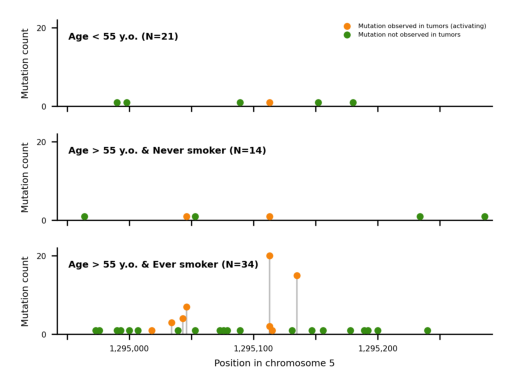

In [33]:
# put together needle plots
needle_top = Image.open(os.path.join(figures_dir, "TERT.young.needle.png"))
needle_mid = Image.open(os.path.join(figures_dir, "TERT.old_non_smoker.needle.png"))
needle_bot = Image.open(os.path.join(figures_dir, "TERT.old_smoker.needle.png"))
sep_rows = 0

fig4a_height = needle_top.height + needle_mid.height + needle_bot.height + sep_rows
fig4a_width = needle_bot.width
canvas = Image.new('RGB', (fig4a_width, fig4a_height), 'white')

# top
width = 0
height = 0
canvas.paste(needle_top, (width, height))

# middle
width = 0
height += needle_top.height + sep_rows
canvas.paste(needle_mid, (width, height))

# bottom
width = 0
height += needle_mid.height + sep_rows
canvas.paste(needle_bot, (width, height))

plt.imshow(canvas)
plt.axis('off')
canvas.save(os.path.join(figures_dir, "fig4a.png"))
plt.show()

## Fig4B

In [34]:
mutrate_PA_df = mutrate_df.loc[mutrate_df["REGIONS"] == "protein_affecting"].rename({"SAMPLE_ID": "sample", "GENE": "gene"}, axis = 1)
mutrate_PA_df

,sample,gene,REGIONS,MUTTYPES,MUTRATE_MB,SUBJECT_ID,BANK_ID,AGE,SEX,BMI,...,FOXQ1_depth,CDKN1A_depth,KMT2C_depth,TP53_depth,RB1_depth,FGFR3_depth,PIK3CA_depth,TERTpromoter_depth,total_depth,AGE_above55
0,P19_0042_BDO_01,total,protein_affecting,SNV,2.247730,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
1,P19_0042_BDO_01,ARID1A,protein_affecting,SNV,1.131693,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
2,P19_0042_BDO_01,BMP2K,protein_affecting,SNV,0.000000,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
3,P19_0042_BDO_01,CDKN1A,protein_affecting,SNV,2.989433,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
4,P19_0042_BDO_01,CREBBP,protein_affecting,SNV,1.431757,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13497,P19_0001_BTR_01,STAG2,protein_affecting,SNV,1.708129,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55
13498,P19_0001_BTR_01,TERT,protein_affecting,SNV,0.000000,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55
13499,P19_0001_BTR_01,TERTpromoter,protein_affecting,SNV,0.000000,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55
13500,P19_0001_BTR_01,TP53,protein_affecting,SNV,0.000000,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55


In [35]:
# create new custom age+smoking category
mutrate_PA_df["AGE_above55_smoking"] = np.nan
mutrate_PA_df.loc[mutrate_PA_df["AGE_above55"] == "<55", "AGE_above55_smoking"] = "<55 y.o."
mutrate_PA_df.loc[(mutrate_PA_df["AGE_above55"] == ">55") & (mutrate_PA_df["HISTORY_OF_SMOKING"] == "no"), "AGE_above55_smoking"] = ">55 y.o.\nNever\nsmoker"
mutrate_PA_df.loc[(mutrate_PA_df["AGE_above55"] == ">55") & (mutrate_PA_df["HISTORY_OF_SMOKING"] == "yes"), "AGE_above55_smoking"] = ">55 y.o.\nEver\nsmoker"

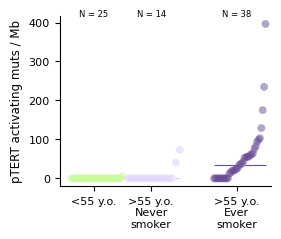

In [36]:
genes_smok = {"TERTpromoter": ""}
clinvar = "AGE_above55_smoking"
metric = "MUTRATE_MB"
plot_config = {"ylabel": "pTERT activating muts / Mb",
               "xlabel": "",
              "figsize": (3.5, 2.5),
              "grid_nrows": 17,
              "grid_ncols": 10,
              "titles": genes_smok,
              "dot_size": 15,
              "line_width": 0.8}

plot_sigmoids(os.path.join(figures_dir, "fig4b_sigmoid.png"),
              prepare_twin_plot_data(mutrate_PA_df, clinvar, genes_smok, clinvar2color[clinvar],metric).reset_index(drop = True),
              clinvar,
              list(genes_smok.keys()),
              clinvar2color[clinvar],
              plot_config,
              plots_general_config,
              mode='twin')

In [37]:
regr_mutrate_PA_smokolder55_df_simple = load_lmem_pred(clinvar = "age_decades:history_smoking", 
                                     res_dir = regressions_smokageinter_dir,
                                     metric = "mutrate.proteinaffecting",
                                     obsdata_df = None
                                    )
regr_mutrate_PA_smokolder55_df_simple["gene"] = regr_mutrate_PA_smokolder55_df_simple["gene"].replace("TERTpromoter", "pTERT")
regr_mutrate_PA_smokolder55_df_simple

/data/bbg/projects/bladder_ts/notebooks/manuscript_figures_vMay2025_45/main/Fig4/../Fig3/load_data_f3.py:26: FutureWarning: Passing 'suffixes' which cause duplicate columns {'age_decades:history_smoking_x'} in the result is deprecated and will raise a MergeError in a future version.
  res_df = interc_df[[clinvar]].merge(


,gene,intercept,coeff,qval,lowci,highci
0,ARID1A,0.486861,0.090377,0.139542,-0.007554,0.188307
1,CDKN1A,0.801069,0.073814,0.327242,-0.041689,0.189316
2,CREBBP,0.686448,0.085161,0.015045,0.027121,0.143202
3,EP300,0.522870,0.095274,0.005207,0.037986,0.152561
4,FOXQ1,0.654511,0.188343,0.027127,0.046603,0.330082
5,KDM6A,1.981813,0.118117,0.345207,-0.039814,0.276048
6,KMT2C,0.165445,0.034019,0.037029,0.006917,0.061120
7,KMT2D,1.432553,0.158972,0.004704,0.066473,0.251471
8,NOTCH2,0.567230,0.070832,0.007448,0.026213,0.115452
9,RB1,0.173506,0.024054,0.037029,0.004993,0.043114


In [38]:
plots_general_config

{'dot_size_scplot': 40,
 'dot_size_coeffplot': 40,
 'dot_sizebelow_coeffplot': 40,
 'dot_color_coeffplot': '#B27DFA',
 'dot_colorabove_coeffplot': '#D62728',
 'dot_colorbelow_coeffplot': '#f29c9e',
 'dot_edgethres_coeffplot': 0.2,
 'dot_edgewidth_coeffplot': 1.5,
 'yxlabel_fontsize': 8.5,
 'yxticks_fontsize': 8,
 'title_fontsize': 9.5,
 'legend_fontsize': 6}

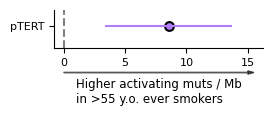

In [42]:
plot_config = {"title": "",
                "ylabels_gene_xcoord": -0.65,
                "arrow_xlim": 15,
                "arrow_yloc": -1.45,
                "arrow_head_width": 0.1,
                "arrow_head_length": .5,
                "effectsize_text": "Higher activating muts / Mb\nin >55 y.o. ever smokers",
                "effectsize_text_loc": 1,
                "effectsize_text_yloc": -2.4,
                "sign_threshold": 0.2,
                "null_effect": 0,
                "coeff_fontsize": 6,
                "writecoeff_offset" : 0.12}
plots_general_config_v = plots_general_config
plots_general_config_v["dot_size_coeffplot"] = 40
plots_general_config_v["dot_color_coeffplot"] = "#B27DFA"
regr_res_coeffplot(regrres_df = regr_mutrate_PA_smokolder55_df_simple, 
                   plot_config = plot_config,
                   plots_general_config = plots_general_config,
                   responses = ["pTERT"], 
                   save_file = os.path.join(figures_dir, "fig4b_regr.png"),
                   regrres2compare_df = None,
                   figsize = (2.7, 0.5), remove_ylabels = False, write_coeff = False)

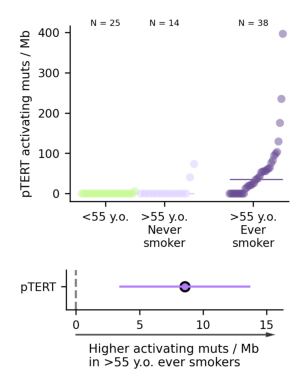

In [43]:
# put together TERT smoking figures
fig4b_up = Image.open(os.path.join(figures_dir, "fig4b_sigmoid.png"))
fig4b_down = Image.open(os.path.join(figures_dir, "fig4b_regr.png"))
sep_rows = 0

fig4b_height = fig4b_up.height + fig4b_down.height + 2*sep_rows
fig4b_width = fig4b_up.width 
canvas = Image.new('RGB', (fig4b_width, fig4b_height), 'white')

# top
width = 0
height = 0
canvas.paste(fig4b_up, (width, height))

# bottom
width = 0
height += fig4b_up.height + sep_rows
canvas.paste(fig4b_down, (width, height))

plt.imshow(canvas)
plt.axis('off')
canvas.save(os.path.join(figures_dir, "fig4b.png"))
plt.show()

## Final figure

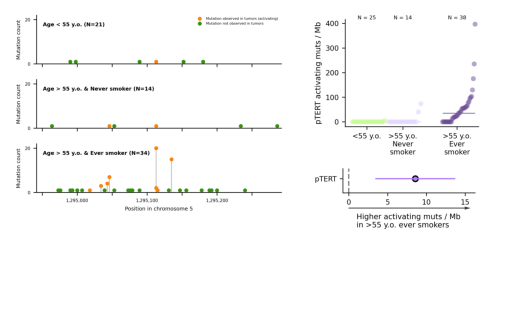

In [44]:
# load images
fig4a = Image.open(os.path.join(figures_dir, "fig4a.png"))
fig4b = Image.open(os.path.join(figures_dir, "fig4b.png"))
fig4c = Image.open(os.path.join(figures_dir, "binomialtest.smoking.age.png"))
fig4c.save(os.path.join(figures_dir, "fig4c.png"), optimize=True, quality = 1)
fig4c = Image.open(os.path.join(figures_dir, "fig4c.png"))
fig4c = fig4c.resize((fig4c.width // 3, fig4c.height // 3), Image.LANCZOS)

sep_rows = 0
sep_cols = 100

# height
fig_height = fig4b.height + fig4c.height + 50
# width
fig_width = fig4a.width + fig4b.width + sep_cols + 100

# create canvas
canvas = Image.new('RGB', (fig_width, fig_height), 'white')

# paste images
## col 1
height = 0
width = 0
canvas.paste(fig4a, (width, height))

## col 2
height += 0
width += fig4a.width + sep_cols
canvas.paste(fig4b, (width, height))
# height += fig4b.height + sep_rows + 50
# width += 50
# canvas.paste(fig4c, (width, height))

plt.imshow(canvas)
plt.axis('off')
canvas.save(os.path.join(figures_dir, "fig4.png"))
plt.show()